# Depression among Indian Students

## Pre-processing

The dataset is available here: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#plt.rcParams['figure.figsize'] = (10, 8) #-> they apply to all plots below
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("student_depression_dataset.csv")

In [3]:
display(df.head())
display(df.info(verbose=True, show_counts=True))
display(df.shape)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

None

(27901, 18)

In [4]:
# there are no np.NaN values and no duplicated
print(df.isnull().sum())
print(df[df.duplicated()])

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thought

In [5]:
#transforming financial stress from object to numeric
df.query("`Financial Stress` == '?'")
df["Financial Stress"].replace("?", df.loc[~(df["Financial Stress"]=="?"),"Financial Stress"].mode()[0], inplace=True)
df["Financial Stress"]=df["Financial Stress"].astype(float)

In [6]:
#stripping sleep duration
df["Sleep Duration"]=df["Sleep Duration"].apply(lambda x: x.strip("'"))

In [7]:
#age should be an int
df["Age"] = df["Age"].astype(int)

In [8]:
#given that 99.9% of people are students, we will only focus on students.
df["Profession"].value_counts(normalize=True)
df.loc[df["Profession"]=="Student",:]
df.drop(["Profession"],axis=1, inplace=True)

In [9]:
#there seems to be only a very few students working and who thus have high work pressure.
#I thus delete "work pressure" and "job satisfaction"
df["Work Pressure"].value_counts()
df.drop(["Work Pressure"], axis=1, inplace=True)

df["Job Satisfaction"].value_counts(normalize=True)
df.drop(["Job Satisfaction"], inplace=True, axis=1)

In [10]:
#Renaming the final columns
df.rename(columns={"Have you ever had suicidal thoughts ?":"Suicidal Thoughts",
                   "Family History of Mental Illness":"Family History",
                  "Work/Study Hours":"Work_study_hours"}, inplace=True)

In [11]:
df.set_index("id", inplace=True)

In [12]:
df.to_csv("depression_after_eda.csv", index=False)

In [13]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work_study_hours,Financial Stress,Family History,Depression
id,,,,,,,,,,,,,,
2,Male,33,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [14]:
df.shape

(27901, 14)

#### Boxplot

In [15]:
#plt.style.available
#plt.style.use(plt.style.available[-1]); #-> tableau-coloblind10 has a nice layout.

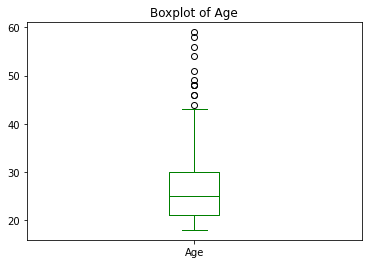

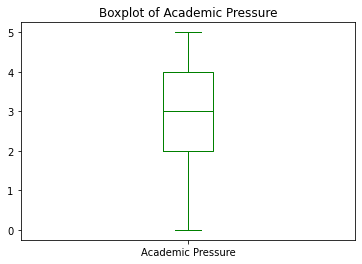

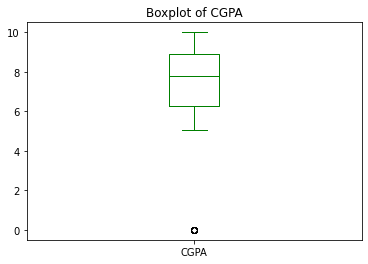

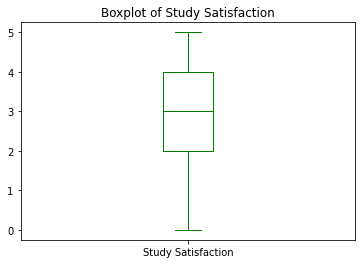

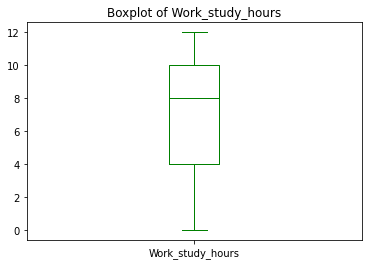

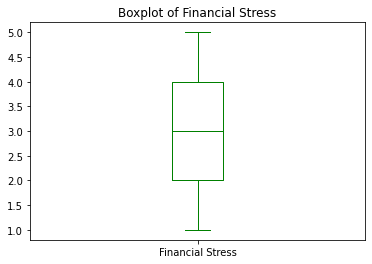

<Figure size 432x288 with 0 Axes>

In [16]:
#analysis of numerical variables
for feature in df.columns:
    if df[feature].dtypes != "object" and feature!="Depression": 
        #alternative: include=["int64", "float64"]
        df[feature].plot(kind="box", color="green", showfliers=True);
        plt.title(f"Boxplot of {feature}");
        plt.savefig(f'Boxplot_{feature}.png'); #
        plt.show();
        plt.tight_layout();

#### Histograms

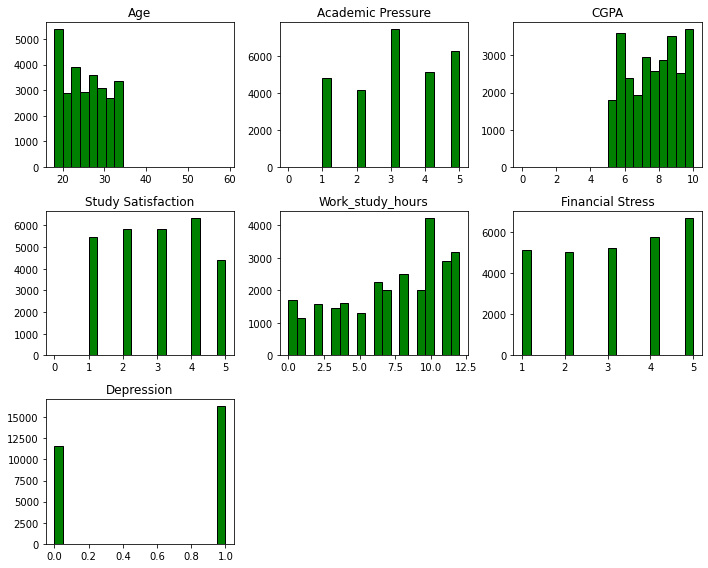

In [17]:
df.hist(figsize=(10,8), edgecolor="black", color="g", bins=20, grid=False)
plt.tight_layout()
plt.savefig("histogram.png", dpi=300, bbox_inches="tight")
plt.show()

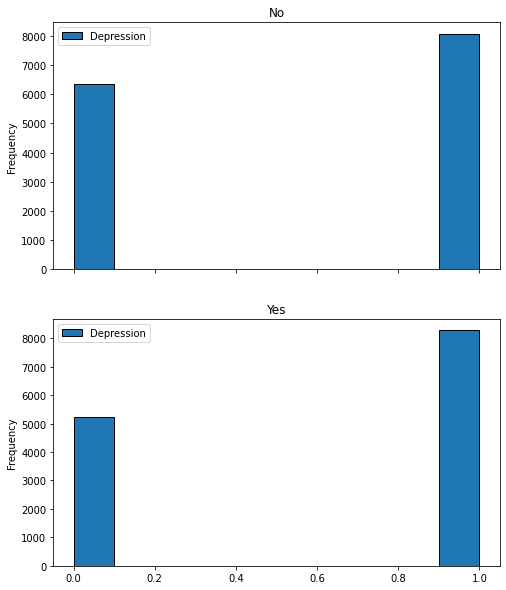

In [18]:
axes = df.plot(sharex=True, kind="hist", column="Depression", by="Family History", edgecolor="black", lw=1, grid=False, figsize=(8,10));
for ax in axes.flat:
    ax.title.set_fontsize(12)
plt.savefig("histogram Depression by Family History.png", dpi=300, bbox_inches="tight")
plt.show()

#### Depressed students

In [19]:
f'Depressed students amount to {round(df["Depression"].value_counts(normalize=True)[1],2)} of the total'

'Depressed students amount to 0.59 of the total'

In [20]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work_study_hours,Financial Stress,Family History,Depression
id,,,,,,,,,,,,,,
2,Male,33,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [21]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Work_study_hours', 'Financial Stress',
       'Family History', 'Depression'],
      dtype='object')

## Exploratory Data Analysis

I conduct exploratory data analysis of the following 13 features, in relation to depression: **Gender, Age, City, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Degree, Suicidal Thoughts, Work/Study Hours, Financial Stress, Family History**.

#### 0 - Statistical Relationship between Features

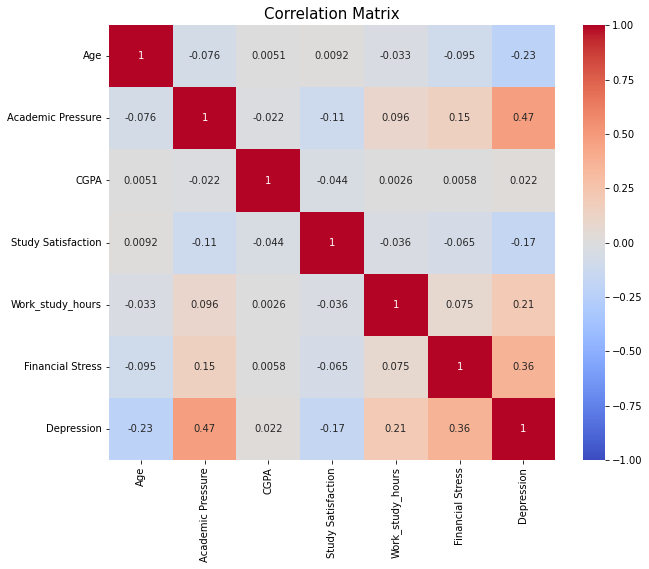

In [22]:
num_var=[index for index,value in df.dtypes.items() if value!="object"]
plt.figure(figsize=(10, 8));
ax=sns.heatmap(df[num_var].corr(), vmin=-1, vmax=+1, linecolor="black", annot=True, cmap="coolwarm", cbar=True);
ax.set_title("Correlation Matrix", fontsize=15);
plt.savefig("Correlation Matrix", dpi=300, bbox_inches="tight");
plt.show()

#alternative 1: sns.heatmap(df.select_dtypes(include="number").corr(),...)
#alternative 2: pd.plotting.scatter_matrix(df, figsize=(20, 15)), to visualise histograms and scatter plots.

The plot shows that there exists a relatively high positive correlation between: *Work Pressure and Job Satisfaction*, *academic pressure and depression* and *study hours and depression*. At the same time, there exists a negative correlation, yet lower compared to the positive one, between *depression and age*, and *depression and study satisfaction*.

#### 1 - Gender

In [56]:
df["Gender"].value_counts(normalize=True)
depressed_students=df.groupby(["Gender"])["Depression"].sum()
total_depressed_students=depressed_students.sum()

In [24]:
stud_depression=df["Depression"].value_counts()[1]
print(f'The % of depression among female students is {round(depressed_students[0]/stud_depression,2)}')
print(f'The % of depression among male students is {round(depressed_students[1]/stud_depression,2)}')

The % of depression among female students is 0.44
The % of depression among male students is 0.56


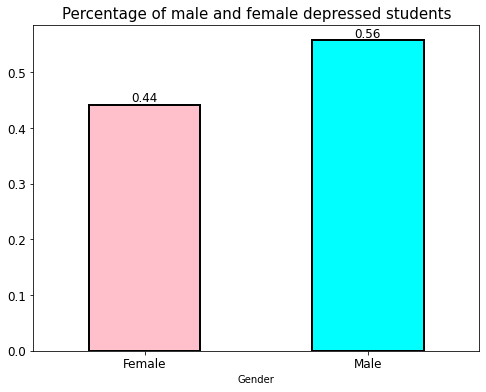

In [25]:
ax = (depressed_students/total_depressed_students).plot(kind="bar", figsize=(8,6), fontsize=12, color=["pink","cyan"], lw=2, edgecolor="black", rot=0)

for bar in ax.patches: #ax.patches is a list of all rectangular shapes (bars) and each bar is a rectangle object
    height = bar.get_height() #this gets the height of the bar
    ax.text( #this gets the actual number as a label on the bar
        bar.get_x() + bar.get_width() / 2, #this finds the horizontal center of the bar
        height,
        f'{height:.2f}',#this creates the text string that will be shown
        ha='center', #horizontal alignment = center
        va='bottom', #vertical alignment = "bottom" means aligning the bottom of the text to the y-position so it sits on top of the bar.
        fontsize=12
    )
ax.set_title("Percentage of male and female depressed students", fontsize=(15))
plt.savefig("Percentage of male and female depressed students", dpi=300, bbox_inches="tight")
plt.show()

#### 2 - Age

In [26]:
df["Age"].value_counts().sort_index()

Age
18    1587
19    1560
20    2237
21    1726
22    1160
23    1645
24    2258
25    1784
26    1155
27    1462
28    2133
29    1950
30    1145
31    1427
32    1262
33    1893
34    1468
35      10
36       7
37       2
38       8
39       3
41       1
42       4
43       2
44       1
46       2
48       3
49       1
51       1
54       1
56       1
58       1
59       1
Name: count, dtype: int64

In [27]:
#I am only focusing on range 18-34, where the largest share of people lies
age_depression_gender_18_34=df.pivot_table(values="Depression", index="Age", columns="Gender", aggfunc="sum").sort_index().loc[18:34]
age_depression_gender_35_on=df.pivot_table(values="Depression", index="Age", columns="Gender", aggfunc="sum").sort_index().loc[35:59].sum(axis=0)
age_depression_gender_35_on_t=pd.DataFrame(age_depression_gender_35_on).T
age_depression_gender_35_on_t.index=["35-59"]
concat_depression_gender=pd.concat([age_depression_gender_18_34,age_depression_gender_35_on_t])

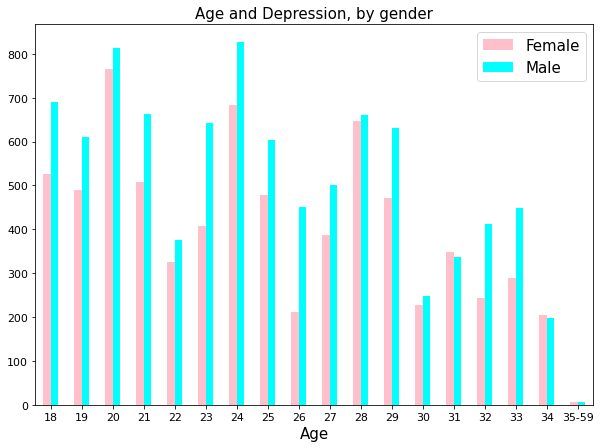

In [28]:
ax = concat_depression_gender.plot(kind="bar", color=["pink", "cyan"], figsize=(10, 7), rot=0, fontsize=11)
ax.set_title("Age and Depression, by gender", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlabel("Age", fontsize=15)
plt.savefig("Age and Depression, by gender", dpi=300, bbox_inches="tight")
plt.show()

#the majority of depressed students are aged 20, 24 and 28.

#### 3 - City

In [29]:
sum_depressed_students_10_cities=df.groupby(["City"])["Depression"].sum().sort_values(ascending=False).head(10).sum(axis=0)

In [30]:
city_dep=df.groupby(["City"])["Depression"].sum().sort_values(ascending=False).head(10)/sum_depressed_students_10_cities
city_dep.sort_values(ascending=False, inplace=True)

In [31]:
#I want to compare the cities' populations with the incidence of depressed students. From a search online:
city_populations_2025 = {
    "Kalyan": 1820000,
    "Hyderabad": 11340000,
    "Srinagar": 1780000,
    "Vasai-Virar": 1790000,
    "Thane": 2690000,
    "Kolkata": 15850000,
    "Ludhiana": 2030000,
    "Lucknow": 4130000,
    "Ahmedabad": 9061820,
    "Patna": 2689540
}

In [32]:
city_pop = (pd.Series(city_populations_2025)/sum(city_populations_2025.values())).sort_values(ascending=False)

In [33]:
concat=pd.concat([city_dep, city_pop], axis=1)
concat.columns=["Depression","Population"]
concat

,Depression,Population
Kalyan,0.129381,0.034223
Hyderabad,0.124255,0.213233
Srinagar,0.105693,0.033470
Vasai-Virar,0.102369,0.033658
Thane,0.093226,0.050582
Kolkata,0.089902,0.298037
Ludhiana,0.089625,0.038171
Lucknow,0.088793,0.077659
Ahmedabad,0.088655,0.170395
Patna,0.088101,0.050573


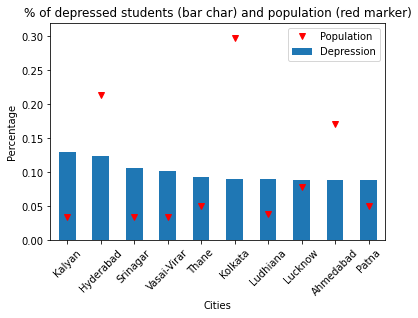

In [34]:
concat["Depression"].plot(kind="bar", rot=45, xlabel="Cities", ylim=(0.00,0.32));
concat["Population"].plot(style="vr", rot=45, lw=20, ylabel="Percentage", ylim=(0.00,0.32));
plt.title("% of depressed students (bar char) and population (red marker)");
plt.savefig("% of depressed students (bar char) and population (red marker)", dpi=300, bbox_inches="tight");
plt.legend()
plt.show();

In [35]:
#Kalyan, Srinagar, Vasai-Virar, Thare, Ludhiana are particularly worrying, 
#as they have a much larger share of depressed students 
#compared to the share of inhabitants they have within this group of cities.

#### 4 - Academic Pressure

In [36]:
df["Academic Pressure"].value_counts().sort_index()

Academic Pressure
0.0       9
1.0    4801
2.0    4178
3.0    7462
4.0    5155
5.0    6296
Name: count, dtype: int64

In [37]:
df["Academic Pressure"] = pd.Categorical(df["Academic Pressure"], categories=[0,1,2,3,4,5])
acad_press_depression=pd.crosstab(df["Academic Pressure"], df["Depression"], margins=True)
acad_press_depression=(acad_press_depression/acad_press_depression.loc["All","All"]).loc[[0,1,2,3,4,5],[0,1]]
acad_press_depression

Depression,0,1
Academic Pressure,,
0,0.000179,0.000143
1,0.138669,0.033404
2,0.093617,0.056127
3,0.106555,0.160890
4,0.044084,0.140676
5,0.031397,0.194258


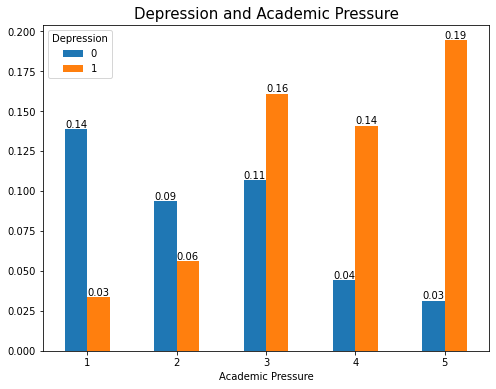

In [38]:
#depressed students with highest academic pressure are 20% of all students.
ax = acad_press_depression.iloc[1:6].plot(kind="bar", figsize=(8,6), rot=0) #academic pressure = 0 is inconsequential
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
ax.set_title("Depression and Academic Pressure", fontsize=15)
plt.savefig("Depression and Academic Pressure", dpi=300, bbox_inches="tight")
plt.show()

#academic pressure is higher for depressed people.

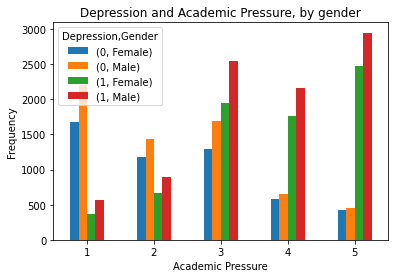

In [39]:
ax=pd.crosstab(index=df["Academic Pressure"], columns=[df["Depression"], df["Gender"]]).iloc[1:6].plot(kind="bar", rot=0);
ax.set_title("Depression and Academic Pressure, by gender", fontsize=12);
ax.set_ylabel("Frequency");

In [40]:
#academic pressure and financial stress
academ_press_fin_stress = pd.crosstab(index=df["Academic Pressure"], columns=[df["Depression"], df["Financial Stress"]]).iloc[1:6]
academ_press_fin_stress

Depression            0                         1                       
Financial Stress    1.0   2.0  3.0  4.0  5.0  1.0  2.0   3.0   4.0   5.0
Academic Pressure                                                       
1                  1079  1034  743  597  416   84  122   185   232   309
2                   830   596  470  412  304  146  158   296   387   579
3                   944   685  566  447  331  443  505   822  1183  1536
4                   378   339  197  197  119  414  621   705   984  1201
5                   257   232  167  132   88  545  769  1071  1203  1832

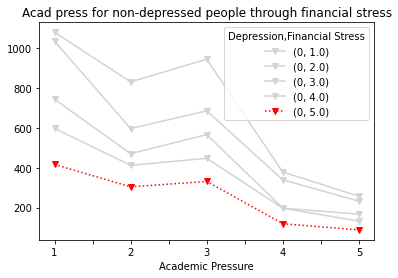

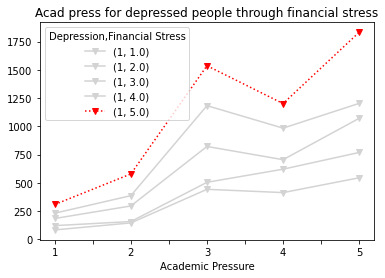

In [41]:
styles = ["-v"] * 4 + [":v"]
colors = ["lightgrey"] * 4 + ["red"]
ax1=academ_press_fin_stress.iloc[:,0:5].plot(style=styles, color=colors);
ax1.set_title("Acad press for non-depressed people through financial stress");
ax2=academ_press_fin_stress.iloc[:,5:11].plot(style=styles, color=colors);
ax2.set_title("Acad press for depressed people through financial stress");

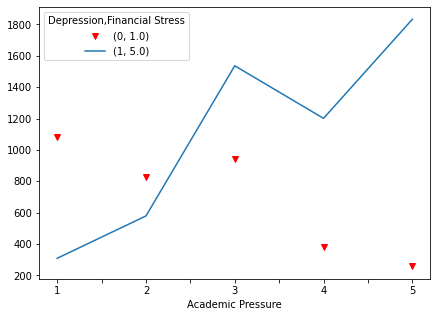

In [42]:
academ_press_fin_stress.iloc[:,[0,9]].plot(style=["vr"], figsize=(7,5));

#### 5 - CGPA

In [43]:
df["CGPA"].describe()

count    27901.000000
mean         7.656104
std          1.470707
min          0.000000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

In [44]:
display(round(df["CGPA"].describe(),2))
display(round(df.groupby("Depression")["CGPA"].describe().T,2))
#there doesn't seem to be statistically significant differences, 
#this makes sense since correlation of depression and CGPA is very low.

count    27901.00
mean         7.66
std          1.47
min          0.00
25%          6.29
50%          7.77
75%          8.92
max         10.00
Name: CGPA, dtype: float64

Depression,0,1
count,11565.00,16336.00
mean,7.62,7.68
std,1.49,1.45
min,0.00,0.00
25%,6.25,6.37
50%,7.64,7.85
75%,8.93,8.91
max,10.00,10.00


#### 6 - Study Satisfaction

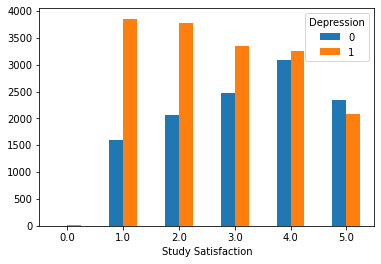

In [45]:
df.groupby(["Study Satisfaction"])["Depression"].value_counts().unstack().plot(kind="bar", rot=0);
#alternative: crosstab
#obv, if I sum, only depression=1 gets counted in.

In [46]:
df.pivot_table(index=["Study Satisfaction"], values=["Depression"], aggfunc=["sum"])

,sum
,Depression
Study Satisfaction,
0.0,6
1.0,3857
2.0,3768
3.0,3353
4.0,3264
5.0,2088


In [47]:
# Obviously, given that it's "sum", only depression = 1 gets counted in. The sum is equal to the number of depressed students.
df.groupby(["Study Satisfaction"])["Depression"].sum().sum(axis=0)

16336

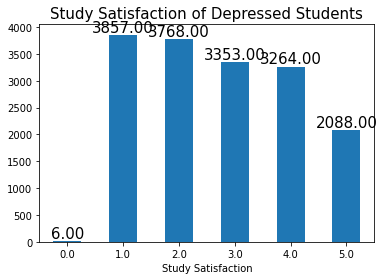

In [48]:
ax=df.groupby(["Study Satisfaction"])["Depression"].sum().plot(kind="bar");
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=15)
ax.set_title("Study Satisfaction of Depressed Students", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
plt.savefig("Study Satisfaction of Depressed Students", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
pivot_table_ss=pd.pivot_table(df, values="Depression", columns="Gender", index="Study Satisfaction", aggfunc="sum", margins=True)/16308
pivot_table_ss=pivot_table_ss.iloc[[1,2,3,4,5],[0,1]]
pivot_table_ss

Gender,Female,Male
Study Satisfaction,,
1.0,0.098786,0.137724
2.0,0.102649,0.128403
3.0,0.090998,0.114606
4.0,0.088607,0.111540
5.0,0.061565,0.066470


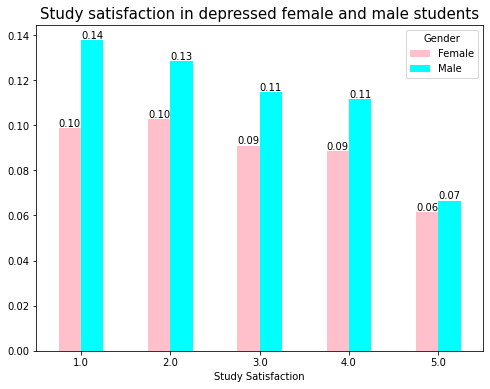

In [50]:
ax=pivot_table_ss.plot(kind="bar", color=["pink","cyan"], figsize=(8,6));
ax.set_title("Study satisfaction in depressed female and male students", fontsize=15);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.savefig("Study satisfaction in depressed female and male students", dpi=300, bbox_inches="tight");

In [51]:
#doing the same analysis for the non-depressed students
df_0=df[df["Depression"]==0]
df_0

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work_study_hours,Financial Stress,Family History,Depression
id,,,,,,,,,,,,,,
8,Female,24,Bangalore,2,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31,Srinagar,3,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
32,Female,25,Jaipur,4,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
33,Male,29,Pune,2,5.70,3.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
52,Male,30,Thane,3,9.54,4.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140681,Male,23,Srinagar,3,6.00,2.0,More than 8 hours,Healthy,MBBS,Yes,12.0,4.0,No,0
140684,Male,31,Lucknow,2,7.27,5.0,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
140685,Female,27,Surat,5,5.75,5.0,5-6 hours,Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0


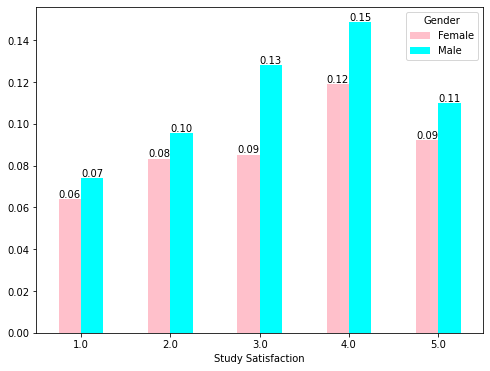

In [52]:
ax = (pd.crosstab(df_0["Study Satisfaction"], df_0["Gender"], margins=True)/11562).iloc[[1,2,3,4,5],[0,1]].plot(kind="bar", color=["pink","cyan"], figsize=(8,6));
plt.xticks(rotation=0);

for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.savefig("Study satisfaction in non-depressed female and male students", dpi=300, bbox_inches="tight");

In [53]:
pivot_table_ss=pd.pivot_table(df, values="Depression", columns="Gender", index="Study Satisfaction", aggfunc="sum", margins=True)/16308

#### 7 - Sleep Duration

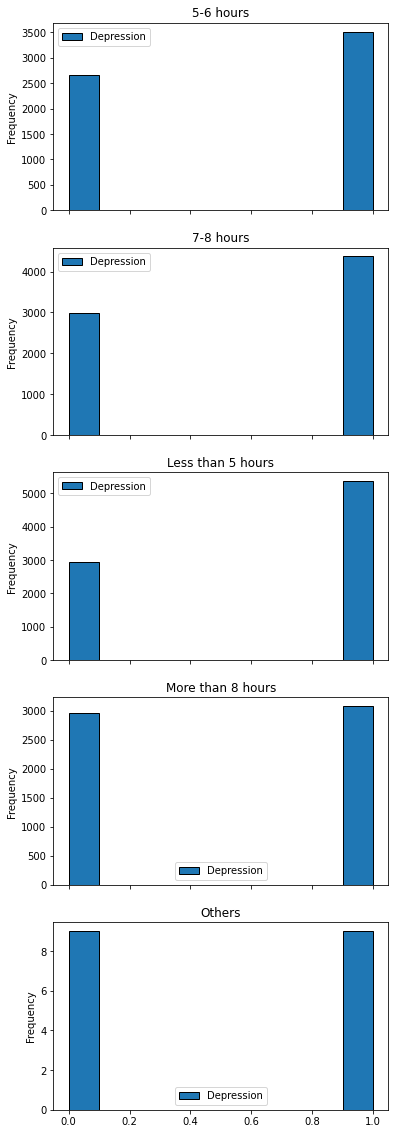

In [54]:
axes = df.plot(sharex=True, kind="hist", column="Depression", by="Sleep Duration", edgecolor="black", lw=1, grid=False, figsize=(6,20));
for ax in axes.flat:
    ax.title.set_fontsize(12)
plt.savefig("histogram Depression by Sleep Duration.png", dpi=300, bbox_inches="tight")
plt.show()

In [55]:
group = df.groupby(["Sleep Duration"])["Depression"].value_counts().unstack(fill_value=0)
group.drop(["Others"], inplace=True)
group

Depression,0,1
Sleep Duration,,
5-6 hours,2666,3517
7-8 hours,2975,4371
Less than 5 hours,2949,5361
More than 8 hours,2966,3078


In [ ]:
group=group.loc[["Less than 5 hours", "5-6 hours", "7-8 hours", "More than 8 hours"],:]
group

In [ ]:
ax=group.plot(kind="bar", figsize=(10,6), colormap="viridis")
ax.set_xlabel("Sleep Duration")
ax.set_ylabel("Number of People")
ax.set_title("Depression Levels by Sleep Duration")
plt.legend(title="Depression")
plt.tight_layout()
plt.show()

In [ ]:
group.sum(axis=0)

In [ ]:
df.loc[df["Sleep Duration"]!="Others",:].Depression.value_counts()

#### 8 - Dietary Habits

In [ ]:
axes = df.plot(sharex=True, kind="hist", column="Depression", by="Dietary Habits", edgecolor="black", lw=1, grid=False, figsize=(6,20));
for ax in axes.flat:
    ax.title.set_fontsize(12)
plt.savefig("histogram Depression by Dietary Habits.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
df["Dietary Habits"].value_counts(normalize=True)

In [ ]:
df["Dietary Habits"] = pd.Categorical(df["Dietary Habits"], categories=["Healthy", "Moderate", "Unhealthy"])
crosstab_diet=pd.crosstab(df["Dietary Habits"], df["Depression"], margins=True)
crosstab_diet=(crosstab_diet/crosstab_diet.loc["All","All"]).iloc[0:3,0:2]

In [ ]:
ax=crosstab_diet.plot(kind="bar", rot=0, fontsize=12);
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
ax.set_title("Dietary habits (categories)", fontsize=12);
ax.set_xlabel("categories", fontsize=12);
plt.savefig("Dietary habits (categories)", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [ ]:
pivot_diet=pd.pivot_table(df, values="Depression", columns="Dietary Habits" , index="Gender", aggfunc="sum", margins=True).T
pivot_diet=(pivot_diet/pivot_diet.loc["All","All"]).iloc[0:3,0:2]
pivot_diet

In [ ]:
ax=pivot_diet.plot(kind="bar", fontsize=12, color=["pink", "cyan"], rot=0);
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
ax.set_title("Dietary habits for depressed students, by gender", fontsize=12);
ax.set_xlabel("Gender", fontsize=12);
plt.savefig("Dietary habits for depressed students, by gender", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

#### 9 - Degree

In [ ]:
#do people pursing certain degrees display higher levels of depression?
crosstab_CGPA=pd.crosstab(df["Degree"], df["Depression"], margins=True).sort_values(by=[1],ascending=False)
crosstab_CGPA_short = (crosstab_CGPA/crosstab_CGPA.loc["All","All"]).iloc[1:11,0:2]

In [ ]:
ax=(crosstab_CGPA_short*100).plot(kind="bar", figsize=(10,5));
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

#15.4% of all depressed people in our dataset do not have a University degree.

#class 12 = high school diploma

In [ ]:
df_class12=df.loc[df["Degree"]=="'Class 12'",:]
crosstab = pd.crosstab(df_class12["Gender"], df_class12["Depression"])
ax = crosstab.plot(kind="bar", figsize=(8,6))

for bar in ax.patches: 
    height = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom',fontsize=10)

plt.ylabel("Count")
plt.title("Depression by Gender")
plt.legend(title="Depression")
plt.tight_layout()
plt.show()

#### 10 - Suicidal Thoughts

In [ ]:
ax=df.groupby("Depression")["Suicidal Thoughts"].value_counts(normalize=True).unstack().plot(kind="bar", figsize=(7,5), rot=0);
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
ax.set_title("Suicidal thoughts and Depression")
plt.savefig("Suicidal thoughts and Depression", dpi=300, bbox_inches="tight")
#85% of depressed people have suicidal thoughts

In [ ]:
ax=pd.crosstab(df["Work_study_hours"], df["Suicidal Thoughts"], normalize=True).plot(kind="bar", rot=0, figsize=(12,5));
ax.set_title("Work_study_hours and suicidal thoughts");
for bar in ax.patches: 
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)
plt.savefig("Suicidal thoughts and work_study_hours", dpi=300, bbox_inches="tight")

#normalize="index" only normalizes wrt work study hours

#### 11 - Work/study hours

In [ ]:
crosstab_study_depression=pd.crosstab(df_s["Study Hours"], df_s["Depression"])
crosstab_study_depression

In [ ]:
# the plot shows that the more depressed people tend to study longer hours (6+)
crosstab_study_depression.plot(kind="bar", stacked=True)

In [ ]:
# depressed students tend to study longer hours. Most depressed students study 10,11,12 hours.
pivot_depression_studyhours=df_s.pivot_table(values="Depression", index="Study Hours", columns="Gender", aggfunc="sum")
more_than_10_hours = pivot_depression_studyhours.loc[[ 10.0, 11.0, 12.0],:].sum(axis=0)
male_and_females_studying_more_than_10_hours=more_than_10_hours/pivot_depression_studyhours.sum(axis=0)
print(f'Depressed female students studying more than 10 hours are {round(male_and_females_studying_more_than_10_hours[0],2)} of the total')
print(f'Depressed male students studying more than 10 hours are {round(male_and_females_studying_more_than_10_hours[1],2)} of the total')

In [ ]:
pivot_depression_studyhours.plot(kind="bar");

#### 12 - Financial Stress

In [ ]:
ax=df.groupby("Financial Stress")["Depression"].value_counts(normalize=True).unstack().plot(kind="bar", rot=0);
ax.set_title("Financial stress and depression");
plt.savefig("Financial stress and depression", dpi=300, bbox_inches="tight")

#### 13 - Family History

In [ ]:
# do people that have a family history of depression have a higher tendency to be depressed themselves?
# there doesn't seem to be a strong relation here
pd.crosstab(df["Family History"], df["Depression"]).plot(kind="bar");

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(16,8))
pd.crosstab(df["Family History"], df["Academic Pressure"]).plot(kind="bar", ax=axes[0][0]);
pd.crosstab(df["Family History"], df["Depression"]).plot(kind="bar", ax=axes[0][1]);
pd.crosstab(df["Family History"], df["Gender"]).plot(kind="bar", ax=axes[0][2]);
pd.crosstab(df["Family History"], df["Sleep Duration"]).plot(kind="bar", ax=axes[1][0]);
pd.crosstab(df["Family History"], df["Dietary Habits"]).plot(kind="bar", ax=axes[1][1]);
pd.crosstab(df["Family History"], df["Suicidal Thoughts"]).plot(kind="bar", ax=axes[1][2]);
pd.crosstab(df["Family History"], df["Study Satisfaction"]).plot(kind="bar", ax=axes[2][0]);

#there doesn't see to be any large differences between those that have a family history of depression and those that don't. 